In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Test the best values

## captcha: 1,  3, 4, 5, 8, 11, 18, 19, 21, 24, 28, 29: 

* cv2.Canny(gray, 28, 47, L2gradient=True)
* cv2.dilate(canny, (2, 2), iterations=3)


### captcha: 6, 23 :

* cv2.dilate(canny, (2, 2), iterations=5)


### captcha: 10:

*  cv2.dilate(canny, (2, 2), iterations=4)


### captcha 30: 

* cv2.dilate(canny, (2, 2), iterations=1)



In [2]:
image_path = "../stars/captcha23.png"

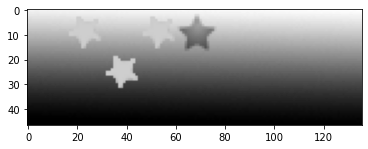

In [3]:
image = cv2.imread(image_path, -1)
gray = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
plt.imshow(gray, cmap="gray")

4


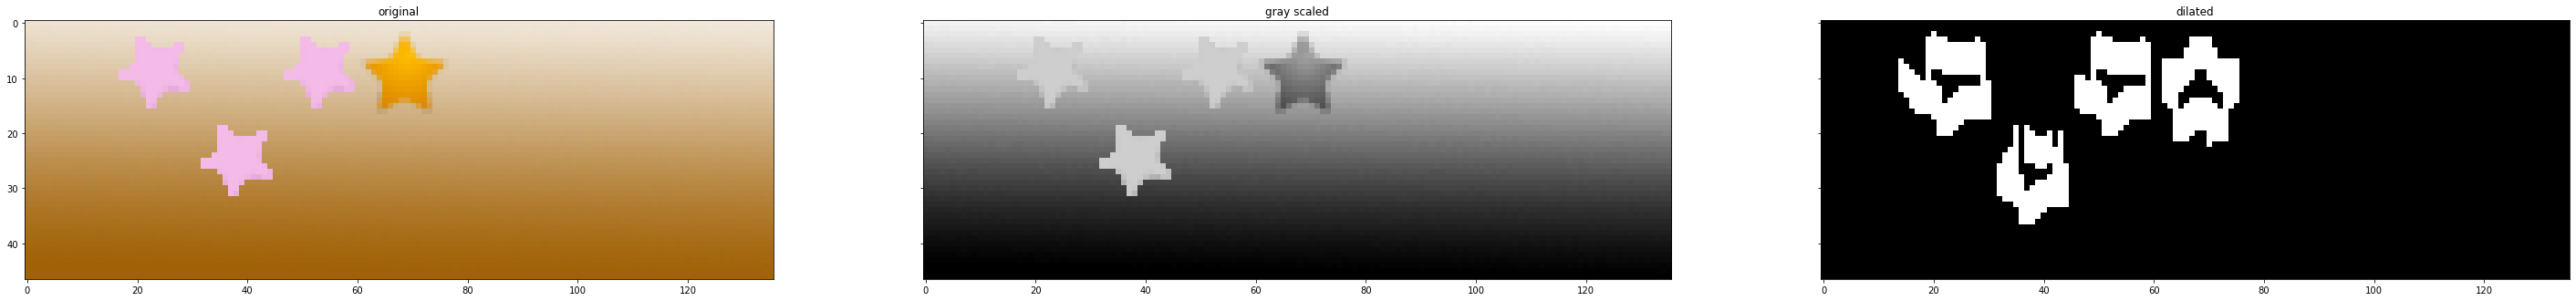

In [4]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gray, 28, 47, L2gradient=True)

dilated = cv2.dilate(canny, (2, 2), iterations=5)

contours, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
fig, axes = plt.subplots(1, 3, figsize=(50, 30), sharex=True, sharey=True)
ax = axes.ravel()

titles = ["original", "gray scaled", "dilated"]
images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB), gray, dilated]

for i, (title, im) in enumerate(zip(titles, images)):
    ax[i].set_title(title)
    ax[i].imshow(im, "gray")

plt.autoscale()
plt.show()

1
2
3
4
contours:  4 star count:  4


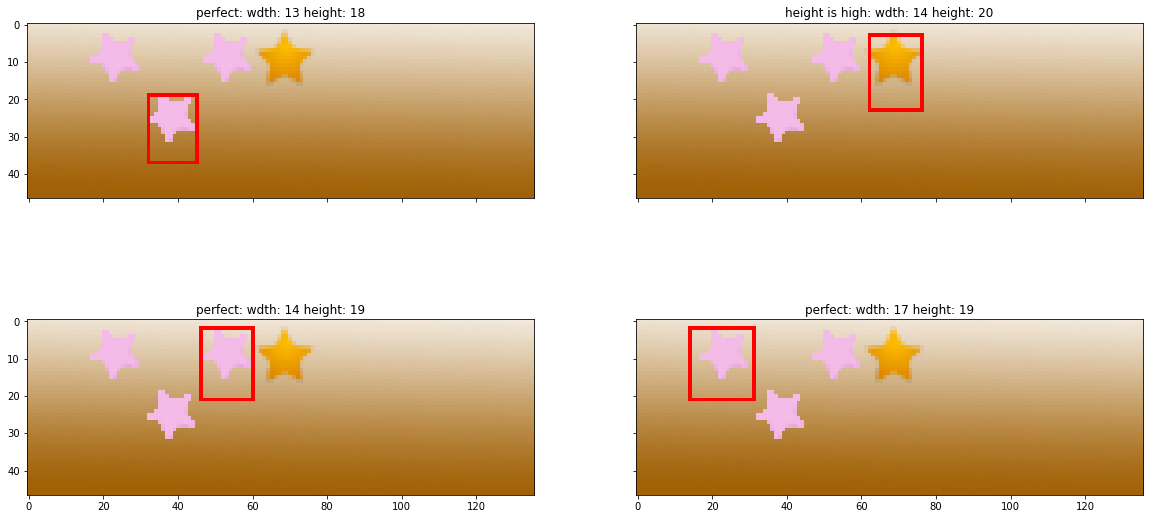

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

count = 0
for i, contour in enumerate(contours):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    (x, y, w, h) = cv2.boundingRect(contour)
    
    ax[i].imshow(cv2.rectangle(image, (x, y), (x+w,y+h), (255, 0, 0), 1), "gray")
    
    if (12 <= w <= 19) and (12 <= h <= 19):
        ax[i].set_title(f"perfect: wdth: {w} height: {h}")
        count += 1
    elif w > 19:
        value = round(w/16)
        ax[i].set_title(f"width is high: wdth: {w} height: {h}")
        count += value
    elif h > 19:
        value = round(h/16)
        ax[i].set_title(f"height is high: wdth: {w} height: {h}")
        count += value
    else:
        ax[i].set_title(f"skipped: wdth: {w} height: {h}")
    print(count)

print("contours: ", len(contours), "star count: ", count)
plt.show()